<a href="https://www.kaggle.com/code/vikkach/customer-personality-clustering?scriptVersionId=219935149" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div style="background-color: #4A6FA5; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Customer Personality. Clustering
</div>

![Image Description](https://helprace.com/wp-content/uploads/2017/05/customer-personality-types.png)

<div style="background-color: #F28C28; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Introduction
</div>

### Problem statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Data

|**Attribute**|**Description**|
|----|----|
|**People**|
|**ID**| Customer's unique identifier|
|**Year_Birth**| Customer's birth year|
|**Education**|Customer's education level|
| **Marital_Status**       | Customer's marital status                                                      |
| **Income**               | Customer's yearly household income                                             |
| **Kidhome**              | Number of children in customer's household                                     |
| **Teenhome**             | Number of teenagers in customer's household                                    |
| **Dt_Customer**          | Date of customer's enrollment with the company                                 |
| **Recency**              | Number of days since customer's last purchase                                  |
| **Complain**             | 1 if the customer complained in the last 2 years, 0 otherwise                  |
| **Products**             |                                                                                 |
| **MntWines**             | Amount spent on wine in last 2 years                                           |
| **MntFruits**            | Amount spent on fruits in last 2 years                                         |
| **MntMeatProducts**      | Amount spent on meat in last 2 years                                           |
| **MntFishProducts**      | Amount spent on fish in last 2 years                                           |
| **MntSweetProducts**     | Amount spent on sweets in last 2 years                                         |
| **MntGoldProds**         | Amount spent on gold in last 2 years                                           |
| **Promotion**            |                                                                                 |
| **NumDealsPurchases**    | Number of purchases made with a discount                                       |
| **AcceptedCmp1**         | 1 if customer accepted the offer in the 1st campaign, 0 otherwise              |
| **AcceptedCmp2**         | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise              |
| **AcceptedCmp3**         | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise              |
| **AcceptedCmp4**         | 1 if customer accepted the offer in the 4th campaign, 0 otherwise              |
| **AcceptedCmp5**         | 1 if customer accepted the offer in the 5th campaign, 0 otherwise              |
| **Response**             | 1 if customer accepted the offer in the last campaign, 0 otherwise             |
| **Place**                |                                                                                 |
| **NumWebPurchases**      | Number of purchases made through the company’s website                         |
| **NumCatalogPurchases**  | Number of purchases made using a catalogue                                     |
| **NumStorePurchases**    | Number of purchases made directly in stores                                    |
| **NumWebVisitsMonth**    | Number of visits to company’s website in the last month                        |


### Target

Need to perform clustering to summarize customer segments.


<div style="background-color: #F28C28; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    EDA
</div>

In [5]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Understanding the dataset

In [6]:
df.shape

(2240, 29)

Let's have a look on data information and description

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Check for missing values and duplicated

In [9]:
print("Checking for duplicates in each column: \n")
df[df.duplicated(subset=[c for c in list(df.columns) if c != 'ID'], keep=False)].sort_values(by='Year_Birth')

Checking for duplicates in each column: 



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
894,8800,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
1771,7592,1946,PhD,Married,51012.0,0,0,18-04-2013,86,102,...,6,0,0,0,0,0,0,3,11,0
1747,7881,1946,Master,Married,66835.0,0,0,28-09-2013,21,620,...,2,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,3386,1992,Graduation,Married,34935.0,0,0,21-06-2013,71,34,...,7,0,0,0,0,0,0,3,11,0
928,10037,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,2,0,0,0,0,0,0,3,11,0
392,2669,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,2,0,0,0,0,0,0,3,11,0
995,5184,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,6,0,0,0,0,0,0,3,11,0


In [10]:
print("Checking for missing values in each column: \n")
df.isnull().sum()

Checking for missing values in each column: 



ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There is missing data in **Income**.

### Plot distribution of numerical features

In [11]:
def plot_distributions(df, title):
    # plot histograms for all numerical columns in the DataFrame
    df.hist(bins=20, figsize=(26, 18), color='#88CC88')
    plt.suptitle(title, fontsize=16)
    plt.show()

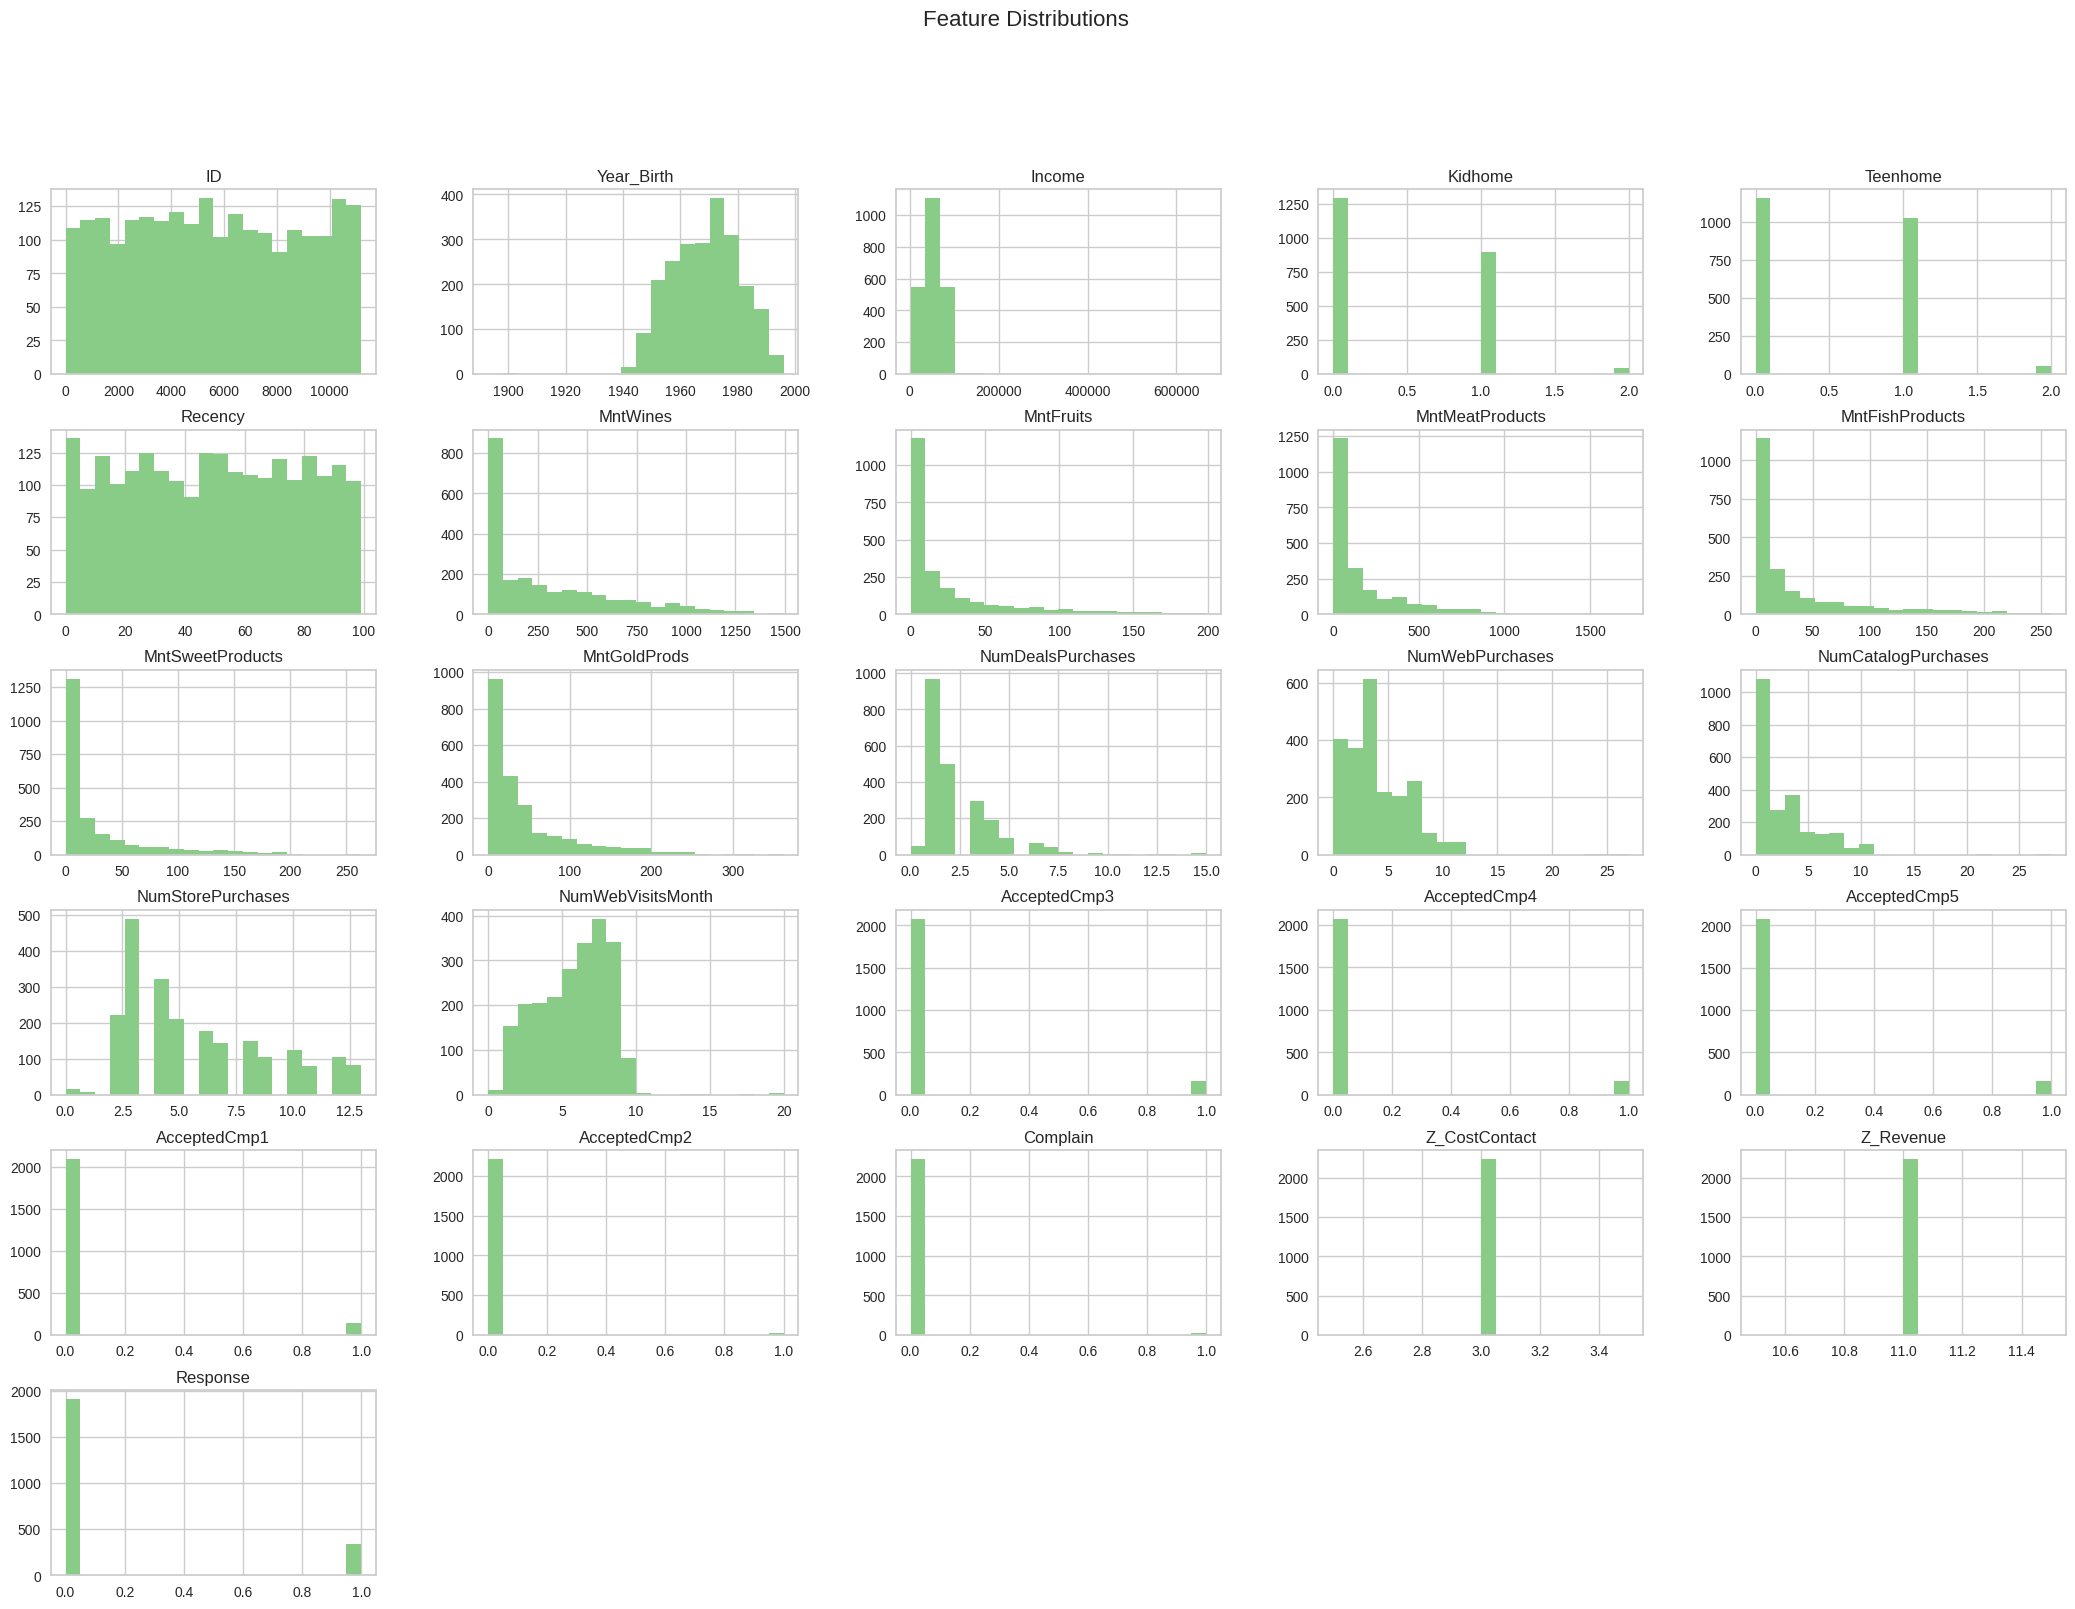

In [12]:
numeric_columns = list(df.select_dtypes(include=['number']))
plot_distributions(df[numeric_columns], "Feature Distributions")

From this distributions we can see, that Year_Birth and Income has strong outliers that can be removed

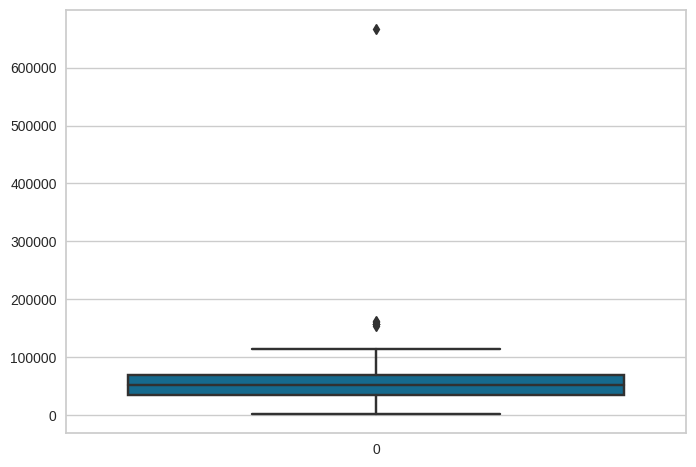

In [13]:
sns.boxplot(data=df['Income'])
plt.show()

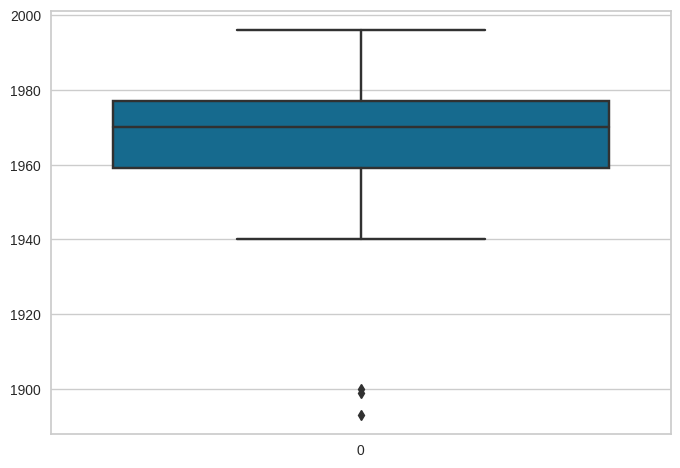

In [14]:
sns.boxplot(data=df['Year_Birth'])
plt.show()

### Correlation between numerical features

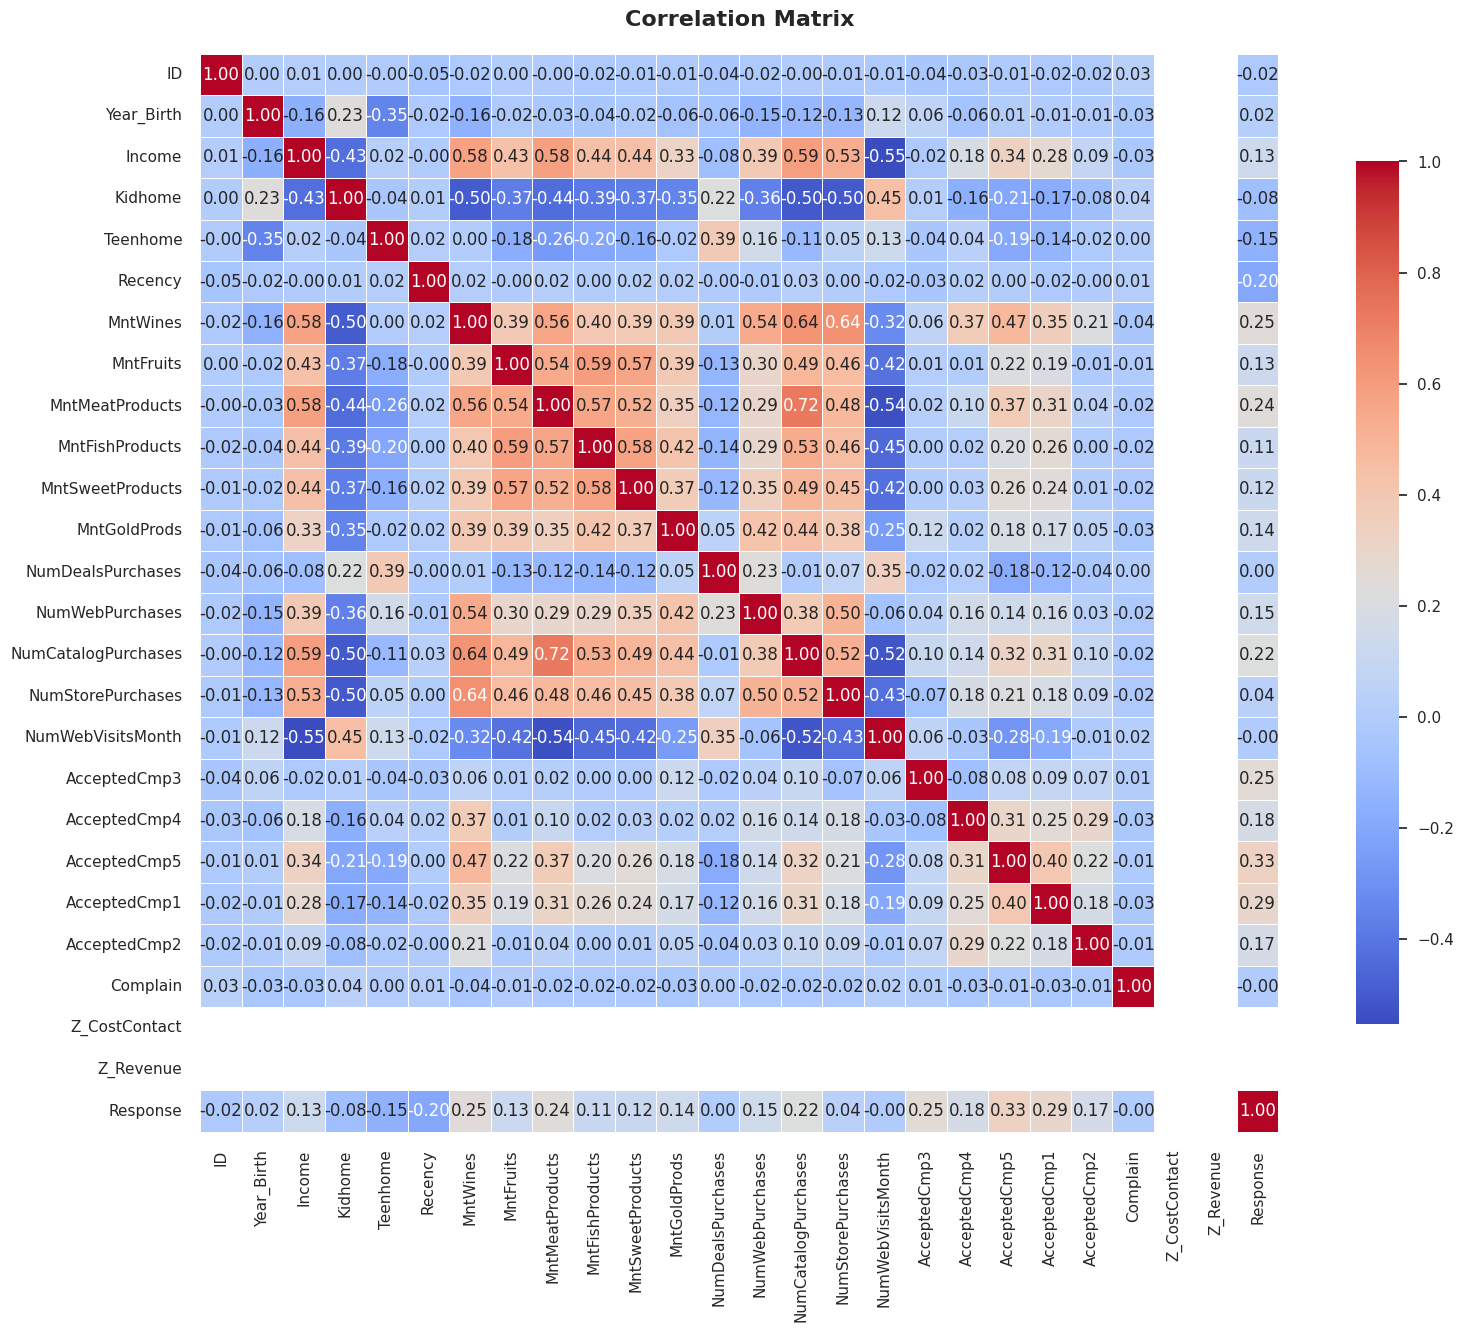

In [15]:
def plot_correlation_matrix(df, title="Correlation Matrix"):
    # Compute the correlation matrix
    corr = df[numeric_columns].corr()

    # Create the heatmap with the selected pastel palette
    sns.set(style="white")  # Clean background
    plt.figure(figsize=(20, 14))
    sns.heatmap(corr, annot=True, cmap="coolwarm",
                fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
    plt.title(title, fontsize=16, weight='bold', pad=20)
    plt.show()

# Example usage
plot_correlation_matrix(df)

### Analyze categorial features

In [16]:
# Dt_Customer should be converted to DateTime
categorical_columns = ['Education', 'Marital_Status']
for col in categorical_columns:
    print(df[col].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Plot frequency of categories:

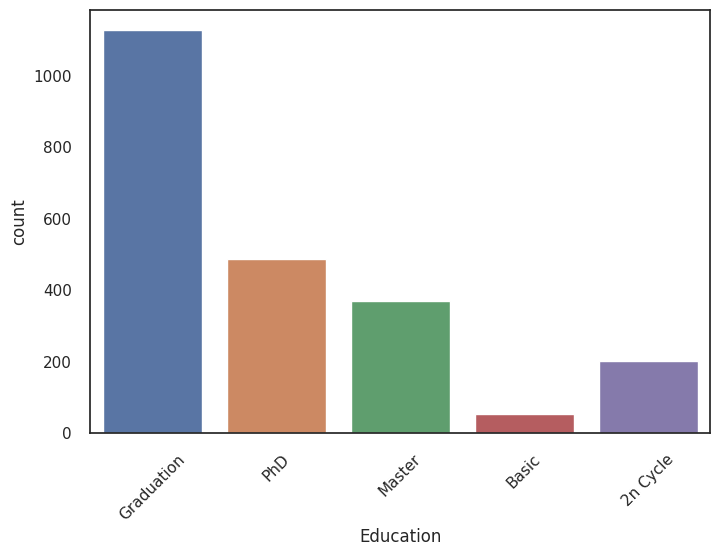

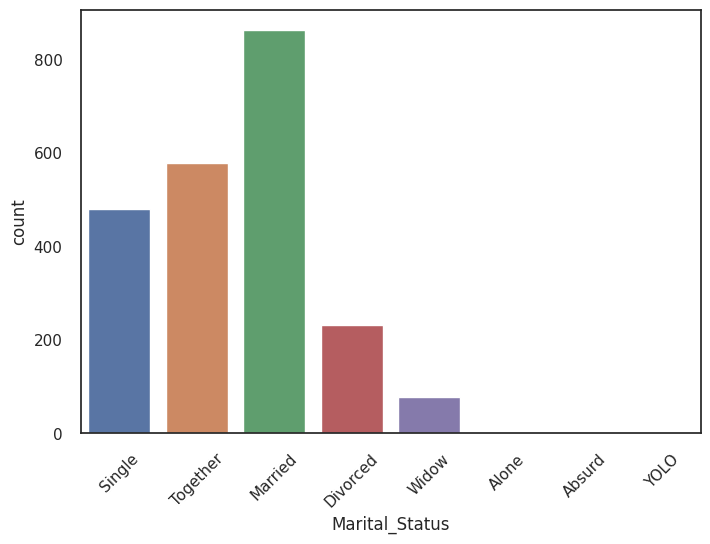

In [17]:
for col in categorical_columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()

**Education** feature has valid values.

**Marital_Status**: *Alone* can be renamed to *Single*. Rows with *Absurd* or *YOLO* values can be removed.

### Summary

* Data has 2240 rows and 29 columns
* Income has missing values
* Dt_Customer has object type insead of DateTime and can be splited into Year, Month features
* Education, Marital_Status have type object
* Some features have outliers
* Marital_Status has invalid values
* Data has some amount of duplicates

<div style="background-color: #F28C28; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Data Preprocessing
</div>

I'll use data preprocessing transformers for data cleaning, transforming, and imputing. These preprocessing steps ensure data consistency, handle missing values intelligently, and prepare features for effective use in machine learning models.

**Fixing issues in data:**

In [18]:
class RemoveOutliers(BaseEstimator, TransformerMixin):
    """
    Remove critical outliers from Income and Year of Birth.
    """
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy() 
        
        # remove rows with outliers
        X = X[(X['Year_Birth'] > 1940) & (X['Income'] < 200000)]
        return X


class FixMaritalStatus(BaseEstimator, TransformerMixin):
    """
    Fix Marital Status values
    """
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy() 

        # replace Alone with Single
        X['Marital_Status'] = X['Marital_Status'].replace('Alone', 'Single')
        
        # remove rows with Absurd or YOLO values
        X = X[~X['Marital_Status'].isin(['YOLO', 'Absurd'])]
        return X


class DropDuplicates(BaseEstimator, TransformerMixin):
    """
    Drop duplicated rows
    """
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy() 
        
        # drop duplicated
        subset = [c for c in list(X.columns) if c != 'ID']
        X = X.drop_duplicates(subset=subset)
        return X


class FixIncome(BaseEstimator, TransformerMixin):
    """
    Imputes missing values based on condition
    """
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy() 
        
        # remove rows with outliers
        X.loc[(X['Income'].isna()), 'Income'] = X['Income'].mode()[0]
        return X

**Creating new features:**

In [19]:
class CampaignResponse(BaseEstimator, TransformerMixin):
    """
    Transformer to sum up campaign responses (AcceptedCmp1 - AcceptedCmp5, Response)
    into a single feature 'TotalAcceptedOffers'.
    """
    
    def __init__(self):
        self.cols_to_sum = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                            'AcceptedCmp4', 'AcceptedCmp5', 'Response']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        X['Total_Accepted_Offers'] = X[self.cols_to_sum].sum(axis=1)
        X['Accepted_Offers'] = X['Total_Accepted_Offers'] != 0
        cols_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                        'AcceptedCmp4', 'AcceptedCmp5', 'Response', 
                        'Total_Accepted_Offers']
        
        return X.drop(columns=cols_to_drop) 

class GroupAge(BaseEstimator, TransformerMixin):
    """ 
    Converts Year_Birth into age bins. 
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy()

        # create Age feature
        current_year = pd.Timestamp.now().year
        X['Age'] = current_year - X['Year_Birth']

        # bin Age to group
        X['Age_Group'] = pd.cut(
            X['Age'], 
            bins=[18, 40, 60, 100], 
            labels=['18-40', '40-60', '60+']
        )
        X.drop(columns=['Year_Birth', 'Age'], inplace=True)
        return X

class GroupIncome(BaseEstimator, TransformerMixin):
    """
    Group income into categories
    """
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy() 
        
        # define income ranges
        bins = [0, 30000, 60000, 200000] 
        labels = ['Low (0-30k)', 'Middle (30k-60k)', 'High (60k-200k)']

        X['Income_Group'] = pd.cut(X['Income'], bins=bins, labels=labels)
        
        # drop the original column
        X = X.drop(columns=['Income'])
        return X

class TotalKids(BaseEstimator, TransformerMixin):
    """ 
    Calculate total kids value. 
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy()

        # calculate number of kids
        X['Family_Size'] = X['Kidhome'] + X['Teenhome']
        X.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
        return X


class HasKids(BaseEstimator, TransformerMixin):
    """ 
    Split data to no kids (0), have kids. 
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy()

        # check if customer has kids/teens
        X['Has_Kids'] = 0
        condition = (
            (X['Kidhome'] != 0) |
            (X['Teenhome'] != 0)
        )
        X.loc[condition, 'Has_Kids'] = 1

        X.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
        return X


class CreateTotalSpending(BaseEstimator, TransformerMixin):
    """
    Create a Total_Spending feature by summing up spending columns.
    """
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy() 
        
        # create Total_Spending feature
        spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
        X['Total_Spending'] = X[spending_columns].sum(axis=1)
        return X

class CustomerTenure(BaseEstimator, TransformerMixin):
    """
    Converts Dt_Customer into a tenure category (New, Mid, Loyal).
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        # convert to datetime and calculate tenure in days
        X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'], format='%d-%m-%Y')
        X['Tenure_Days'] = (pd.Timestamp.now() - X['Dt_Customer']).dt.days
        
        # define tenure categories based on percentiles
        X['Customer_Tenure'] = pd.cut(
            X['Tenure_Days'],
            bins=[0, 
                  X['Tenure_Days'].quantile(0.33), 
                  X['Tenure_Days'].quantile(0.66), 
                  X['Tenure_Days'].max()
                 ],
            labels=['New', 'Mid', 'Loyal']
        )
        
        # drop intermediate columns
        X.drop(columns=['Dt_Customer', 'Tenure_Days'], inplace=True)
        
        return X

class GroupMaritalStatus(BaseEstimator, TransformerMixin):
    """ 
    Split people into single (0), has partner (1)
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        X['Marital_Status'] = X['Marital_Status'].map(
            {'Single': 0, 
             'Together': 1,
             'Married': 1,
             'Divorced': 0,
             'Widow': 0
            }
        )
        return X


class GroupEducation(BaseEstimator, TransformerMixin):
    """ 
    Split customers by education level
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        X['Education'] = X['Education'].map(
            {'PhD': 'Graduation', 
             'Master': 'Graduation',
             'Basic': 'NoGraduation',
             '2n Cycle': 'NoGraduation',
             'Graduation': 'Graduation'
            }
        )
        return X

**Drop identifiers, encoding and normalization:**

In [20]:
class DropColumns(BaseEstimator, TransformerMixin):
    """
    Drops column that is identifier.
    Rationale: 'ID' is identifier.
    """
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy() 
        
        # drop 'ID' as identifiers
        X.drop(['ID'], axis=1, inplace=True)
        return X


class EncodeCategoricalValues(BaseEstimator, TransformerMixin):
    """
    Convert categorical variables into numerical format 
    and allow decoding back to original categories.
    """
    def __init__(self):
        self.encoders = {}  # Dictionary to store LabelEncoders for each column

    def fit(self, X, y=None):
        # fit LabelEncoders for each categorical column
        for col in ['Education', 'Marital_Status', 'Income_Group', 
                    'Age_Group', 'Customer_Tenure']:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self
        
    def transform(self, X):
        # create a copy to avoid modifying the original data
        X = X.copy()
        
        # encode categorical columns using the fitted LabelEncoders
        for col, le in self.encoders.items():
            X[col] = le.transform(X[col])
        return X

    def inverse_transform(self, X):
        # create a copy to avoid modifying the transformed data
        X = X.copy()
        
        # decode categorical columns using the stored LabelEncoders
        for col, le in self.encoders.items():
            X[col] = le.inverse_transform(X[col].astype(int))
        return X


class Normalization(BaseEstimator, TransformerMixin):
    """
    Scales all numerical features to a range between 0 and 1 using Min-Max scaling.
    """
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        # Fit the scaler to the data
        self.scaler.fit(X)
        return self

    def transform(self, X):
        # Create a copy to avoid modifying the original data
        X = X.copy()

        # Transform the data using the fitted scaler
        X_scaled = pd.DataFrame(self.scaler.transform(X), columns=X.columns, index=X.index)
        return X_scaled

    def inverse_transform(self, X):
        # Inverse transform the data back to the original scale
        X_original = pd.DataFrame(self.scaler.inverse_transform(X), columns=X.columns, index=X.index)
        return X_original

In [21]:
preprocessing_pipeline = Pipeline([
    ('fix_income', FixIncome()),
    ('fix_marital_status', FixMaritalStatus()),
    ('drop_duplicates', DropDuplicates()),
    ('customer_tenure', CustomerTenure()),
    ('create_total_spending', CreateTotalSpending()),
    ('drop_columns', DropColumns()),
    ('remove_outliers', RemoveOutliers()),
    ('group_income', GroupIncome()),
    ('group_age', GroupAge()),
    ('has_kids', HasKids()),
    ('has_partner', GroupMaritalStatus()),
    ('education', GroupEducation()),
    ('accepted_offers', CampaignResponse()),
    ('encode_categorical_values', EncodeCategoricalValues()),
    ('normalization', Normalization())
])

In [22]:
# resulting dataset
df_transformed = preprocessing_pipeline.fit_transform(df)

Plot distributions again:

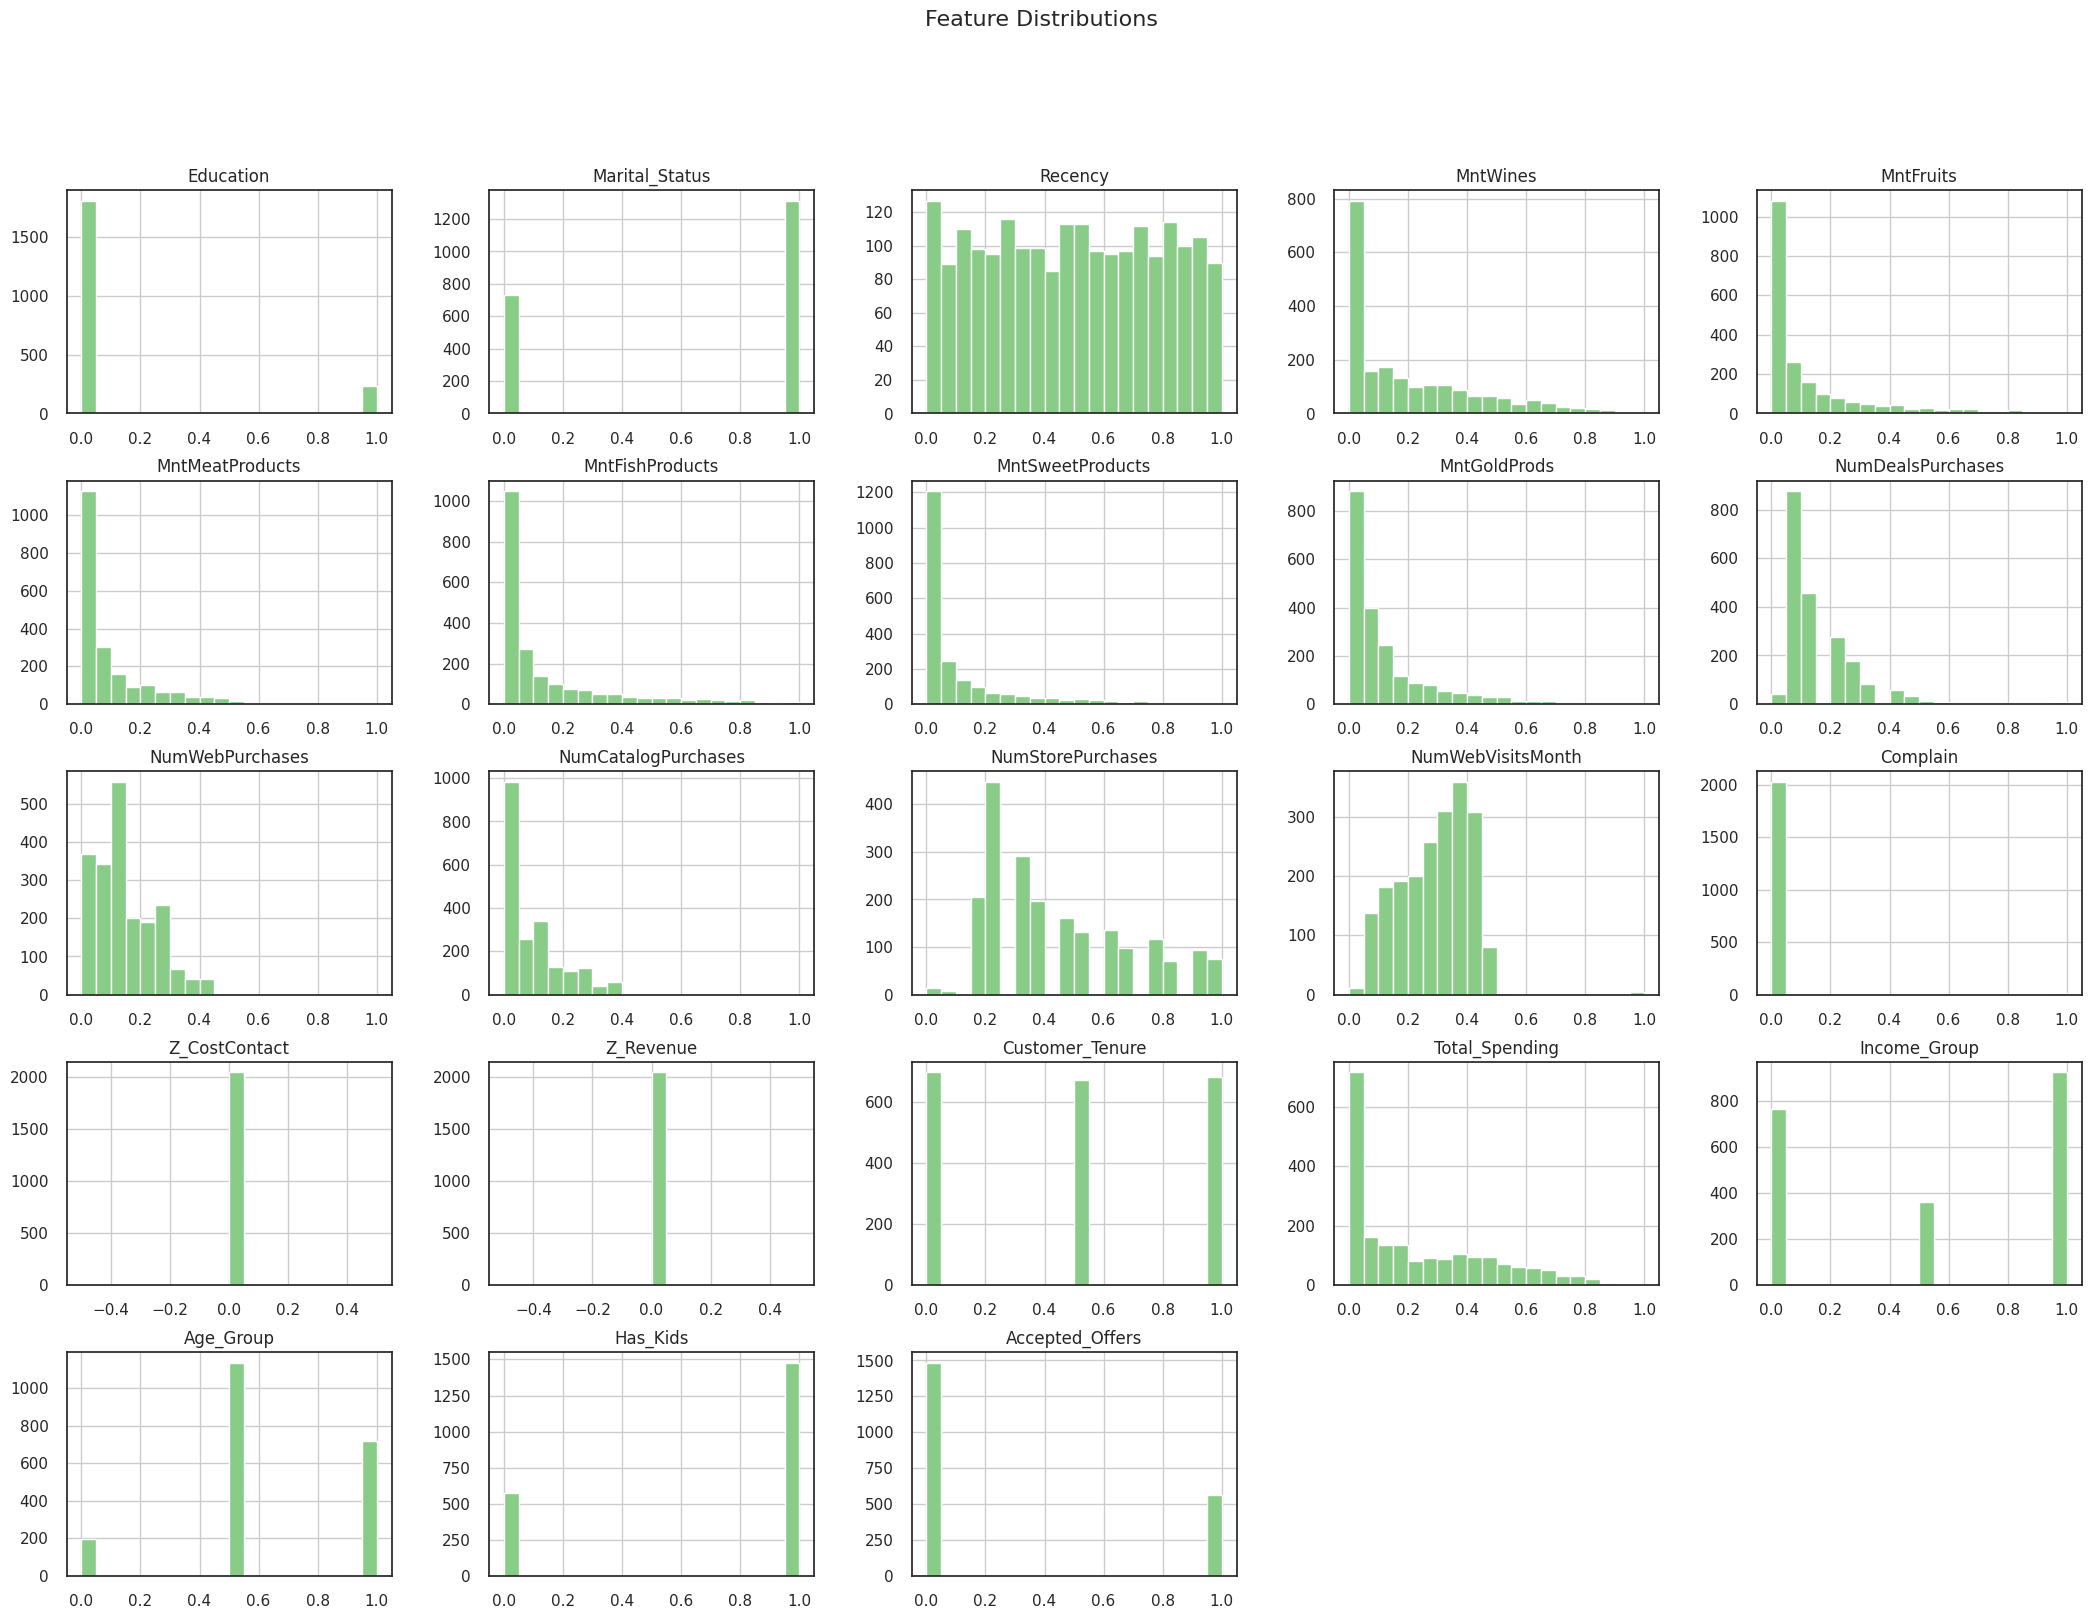

In [23]:
plot_distributions(df_transformed, "Feature Distributions")

Result shape:

In [24]:
df_transformed.shape

(2048, 23)

In [25]:
df_transformed.head()

,Education,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Customer_Tenure,Total_Spending,Income_Group,Age_Group,Has_Kids,Accepted_Offers
0,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,...,0.35,0.0,0.0,0.0,0.0,0.639683,1.0,1.0,0.0,1.0
1,0.0,0.0,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,...,0.25,0.0,0.0,0.0,1.0,0.008730,1.0,1.0,1.0,0.0
2,0.0,1.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,...,0.20,0.0,0.0,0.0,0.5,0.305952,0.0,0.5,0.0,0.0
3,0.0,1.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,...,0.30,0.0,0.0,0.0,1.0,0.019048,0.5,0.5,1.0,0.0
4,0.0,1.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,...,0.25,0.0,0.0,0.0,1.0,0.165476,1.0,0.5,1.0,0.0


<div style="background-color: #F28C28; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Dimensionality Reduction
</div>

Dataset has many features, I'll use PCA to reduce dimensionality.

In [26]:
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_transformed))

In [27]:
df_pca.head()

,0,1,2
0,0.832524,0.779301,0.645145
1,-0.733983,0.648227,-0.445478
2,0.732007,-0.479910,-0.398458
3,-0.493789,-0.392231,-0.404072
4,-0.563198,-0.368324,-0.309157


In [28]:
df_pca.describe()

,0,1,2
count,2.048000e+03,2.048000e+03,2.048000e+03
mean,1.301043e-17,4.163336e-17,2.081668e-17
std,6.860786e-01,4.819684e-01,4.318151e-01
min,-8.441116e-01,-5.690010e-01,-1.010093e+00
25%,-5.622099e-01,-3.573812e-01,-3.105474e-01
50%,-2.067629e-01,-3.021613e-01,-2.852048e-02
75%,5.133215e-01,6.082933e-01,2.899297e-01
max,1.755720e+00,8.603199e-01,1.128779e+00


<div style="background-color: #F28C28; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Clustering
</div>

### Determine the Number of Clusters

Use the Elbow Method to determine the optimal number of clusters.

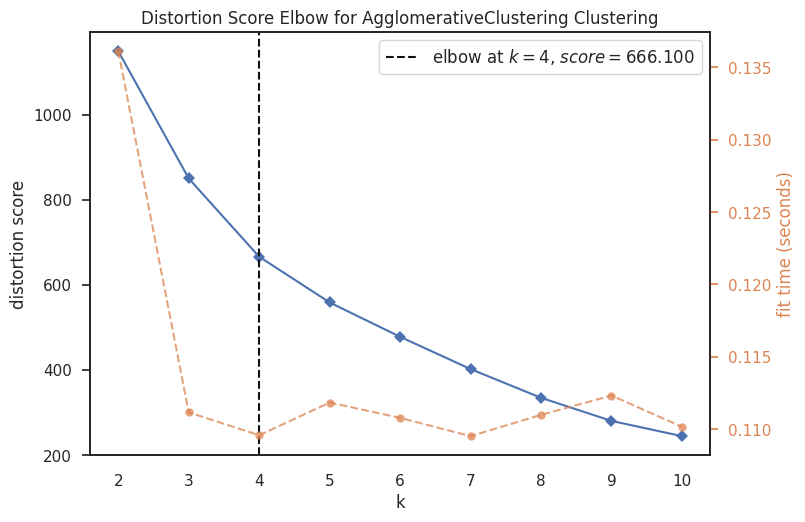

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
elbow_m = KElbowVisualizer(AgglomerativeClustering())
elbow_m.fit(df_pca)
elbow_m.show()

As result, the optimal number of clusters is **4**.

### Apply Clustering Algorithm

In [30]:
kmeans = AgglomerativeClustering(n_clusters=4)

# inverse normalization values to original
normalization_step = preprocessing_pipeline.named_steps['normalization']
df_original_scale = normalization_step.inverse_transform(df_transformed)

# deencode categorical values
encoding_step = preprocessing_pipeline.named_steps['encode_categorical_values']
df_original_scale = encoding_step.inverse_transform(df_original_scale)

df_original_scale['Cluster'] = kmeans.fit_predict(df_pca)

<div style="background-color: #F28C28; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Evaluation
</div>

In [31]:
df_original_scale.describe()

,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Total_Spending,Has_Kids,Accepted_Offers,Cluster
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.0,2048.0,2048.000000,2048.000000,2048.000000,2048.000000
mean,0.641602,48.995117,304.287109,26.193848,167.864746,37.236328,27.236328,43.706055,2.337891,4.100586,2.661133,5.777344,5.323242,0.009277,3.0,11.0,606.524414,0.720215,0.276367,1.133301
std,0.479647,28.969704,336.907724,39.696258,228.415424,54.487637,41.773177,51.820597,1.944036,2.801291,2.932794,3.243457,2.439299,0.095895,0.0,0.0,602.807762,0.449003,0.447310,1.182970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,5.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,23.000000,1.000000,16.000000,2.750000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,69.000000,0.000000,0.000000,0.000000
50%,1.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,396.500000,1.000000,0.000000,1.000000
75%,1.000000,74.000000,505.000000,33.000000,230.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,1045.500000,1.000000,1.000000,2.000000
max,1.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,2525.000000,1.000000,1.000000,3.000000


In [32]:
df_original_scale.head()

,Education,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Complain,Z_CostContact,Z_Revenue,Customer_Tenure,Total_Spending,Income_Group,Age_Group,Has_Kids,Accepted_Offers,Cluster
0,Graduation,0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,...,0.0,3.0,11.0,Loyal,1617.0,Middle (30k-60k),60+,0.0,1.0,2
1,Graduation,0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,...,0.0,3.0,11.0,New,27.0,Middle (30k-60k),60+,1.0,0.0,2
2,Graduation,1,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,...,0.0,3.0,11.0,Mid,776.0,High (60k-200k),40-60,0.0,0.0,3
3,Graduation,1,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,...,0.0,3.0,11.0,New,53.0,Low (0-30k),40-60,1.0,0.0,0
4,Graduation,1,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,...,0.0,3.0,11.0,New,422.0,Middle (30k-60k),40-60,1.0,0.0,0


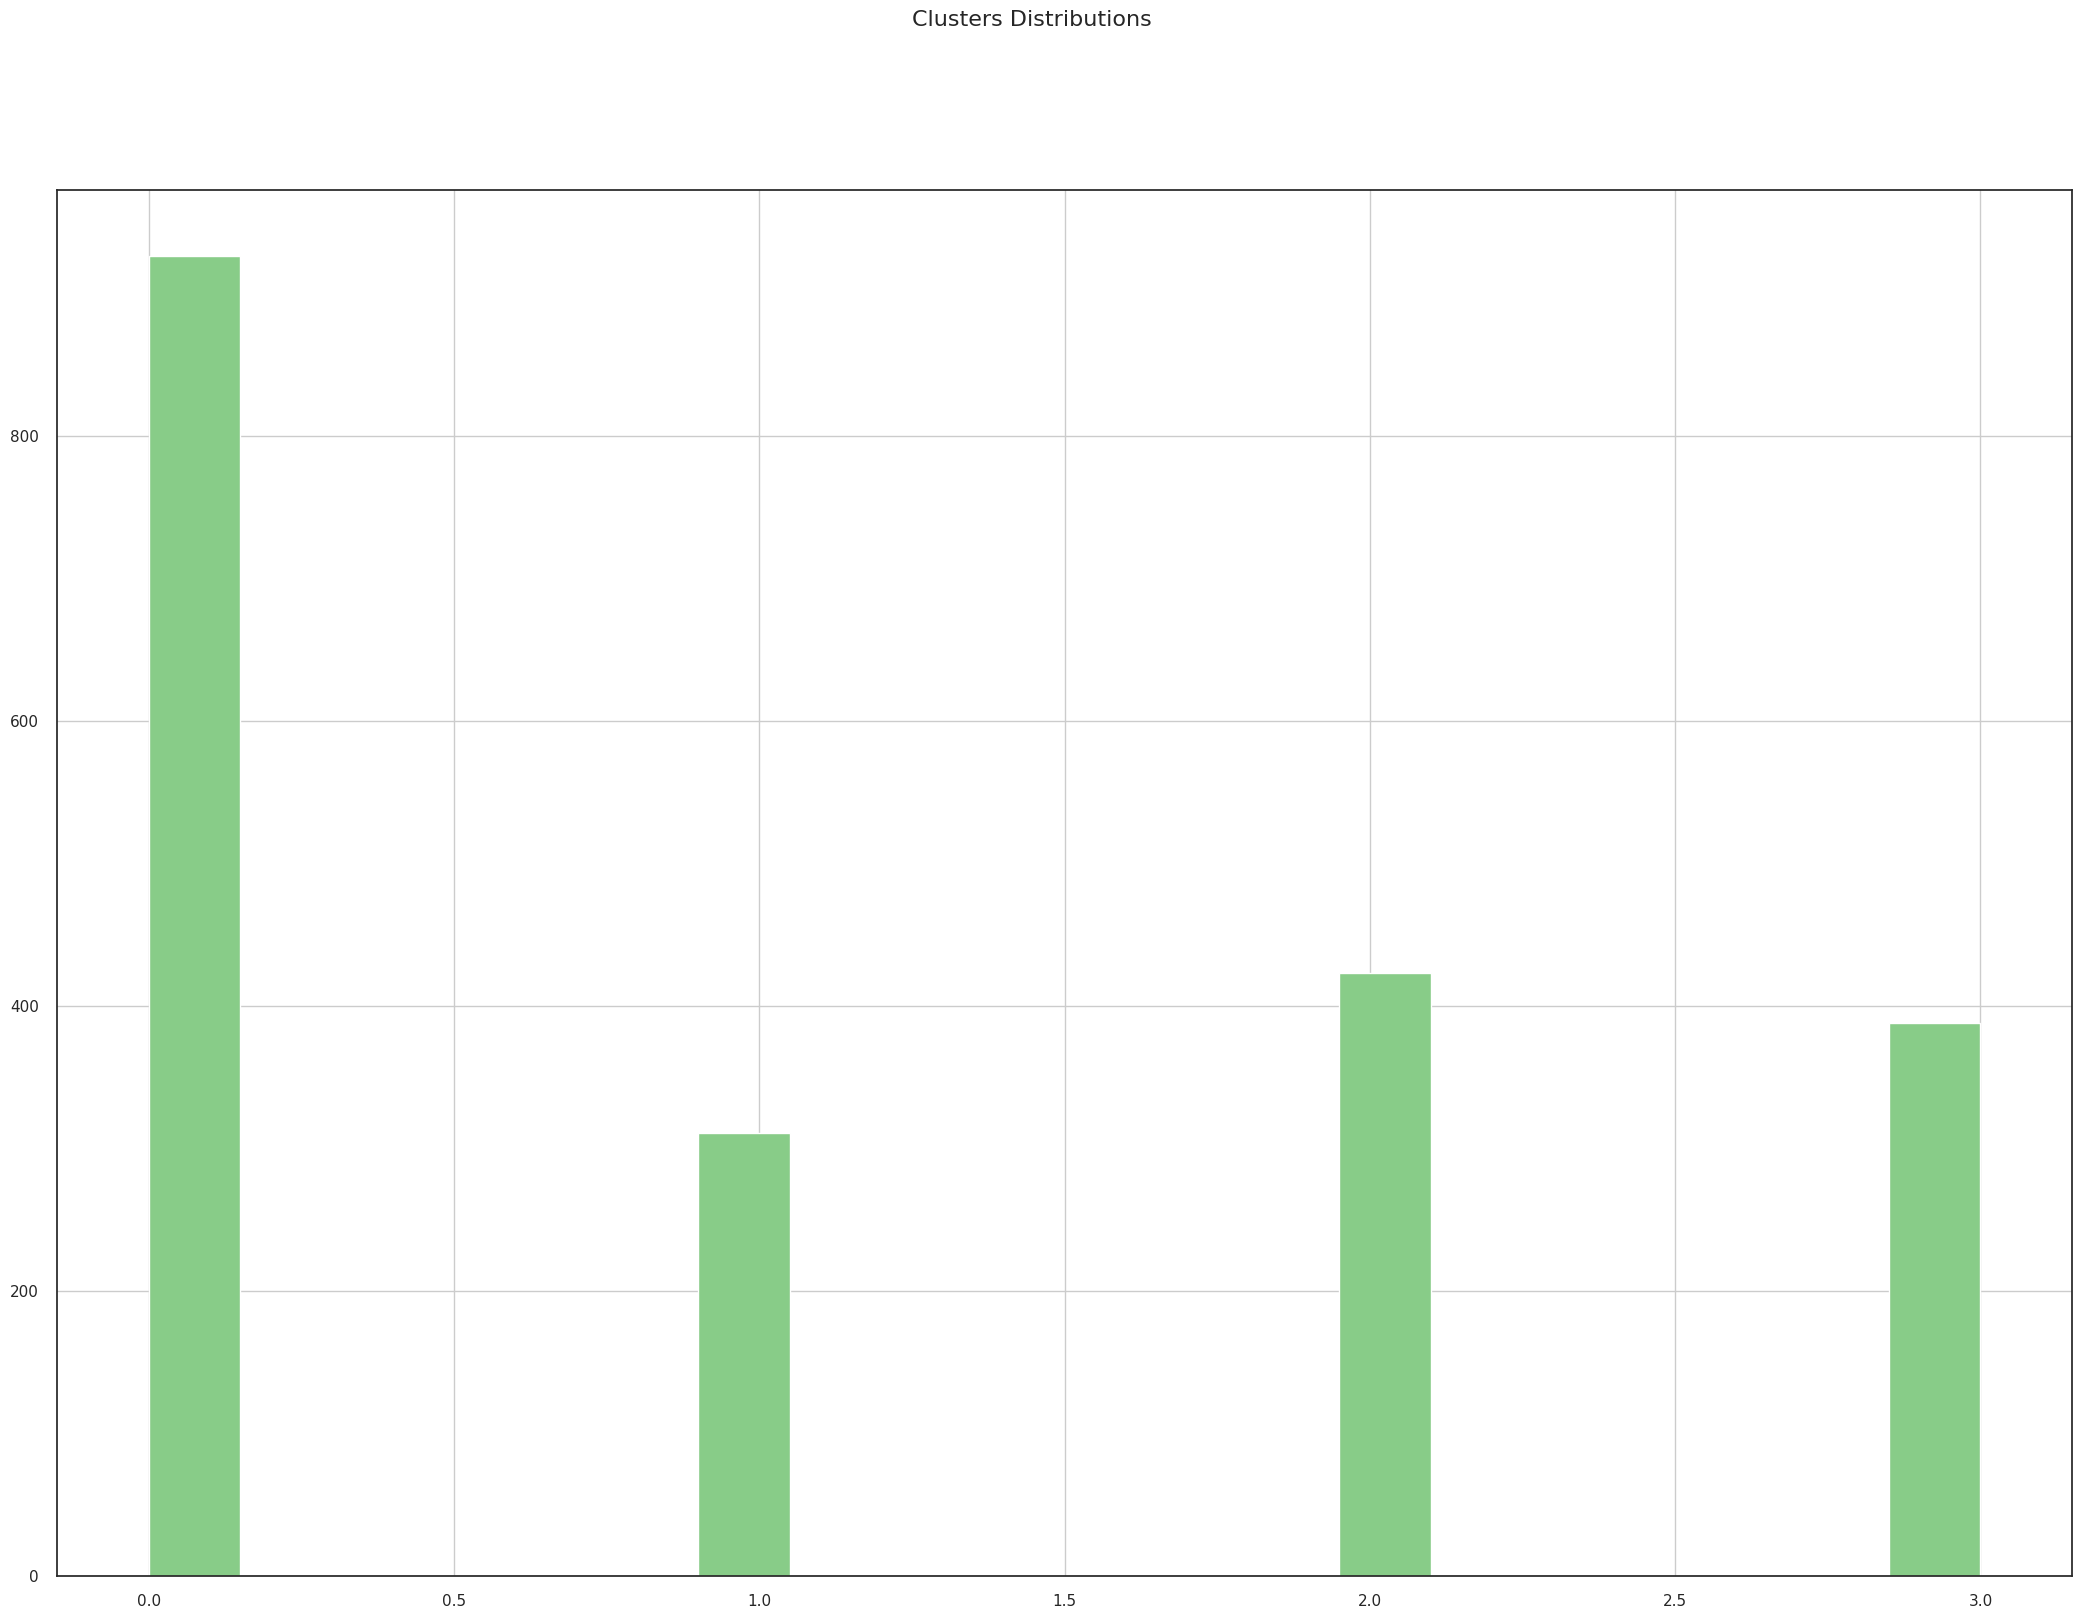

In [33]:
plot_distributions(df_original_scale['Cluster'], "Clusters Distributions")

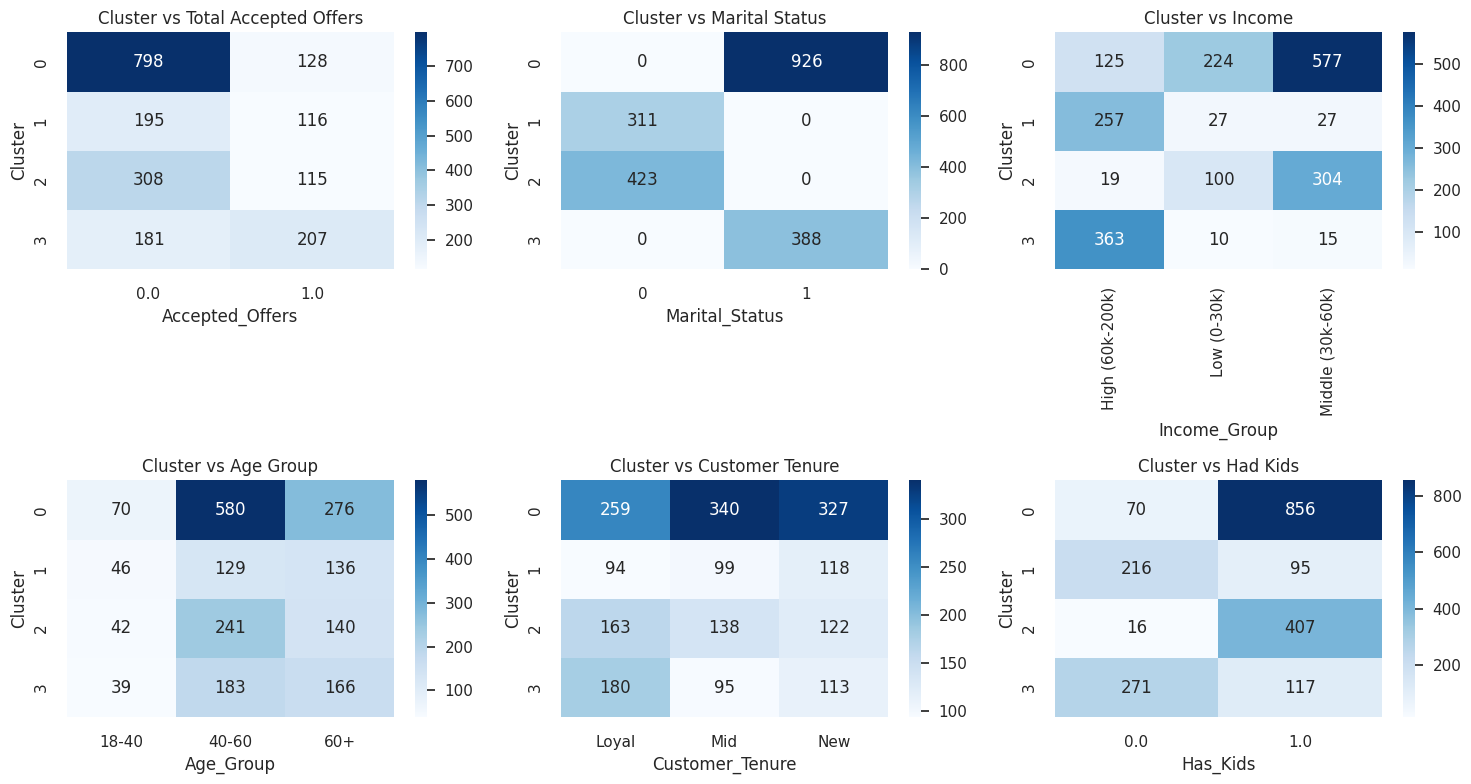

In [34]:
crosstabs = [
    pd.crosstab(df_original_scale['Cluster'], df_original_scale['Accepted_Offers']),
    pd.crosstab(df_original_scale['Cluster'], df_original_scale['Marital_Status']),
    pd.crosstab(df_original_scale['Cluster'], df_original_scale['Income_Group']),
    pd.crosstab(df_original_scale['Cluster'], df_original_scale['Age_Group']),
    pd.crosstab(df_original_scale['Cluster'], df_original_scale['Customer_Tenure']),
    pd.crosstab(df_original_scale['Cluster'], df_original_scale['Has_Kids'])
]

# Set up subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each crosstab as a heatmap
titles = ["Cluster vs Total Accepted Offers", "Cluster vs Marital Status", "Cluster vs Income",
          "Cluster vs Age Group", "Cluster vs Customer Tenure", "Cluster vs Had Kids"]

for i, crosstab in enumerate(crosstabs):
    sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [35]:
df_original_scale.head()

,Education,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Complain,Z_CostContact,Z_Revenue,Customer_Tenure,Total_Spending,Income_Group,Age_Group,Has_Kids,Accepted_Offers,Cluster
0,Graduation,0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,...,0.0,3.0,11.0,Loyal,1617.0,Middle (30k-60k),60+,0.0,1.0,2
1,Graduation,0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,...,0.0,3.0,11.0,New,27.0,Middle (30k-60k),60+,1.0,0.0,2
2,Graduation,1,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,...,0.0,3.0,11.0,Mid,776.0,High (60k-200k),40-60,0.0,0.0,3
3,Graduation,1,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,...,0.0,3.0,11.0,New,53.0,Low (0-30k),40-60,1.0,0.0,0
4,Graduation,1,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,...,0.0,3.0,11.0,New,422.0,Middle (30k-60k),40-60,1.0,0.0,0


In [36]:
def plot_spending(col):
    plt.figure(figsize=(10, 6))
    for cluster in df_original_scale['Cluster'].unique():
        sns.kdeplot(df_original_scale[df_original_scale['Cluster'] == cluster][col], label=f'Cluster {cluster}', fill=True)
    
    plt.title(f"{col} Distribution Across Clusters")
    plt.xlabel(col)
    plt.legend()
    plt.show()

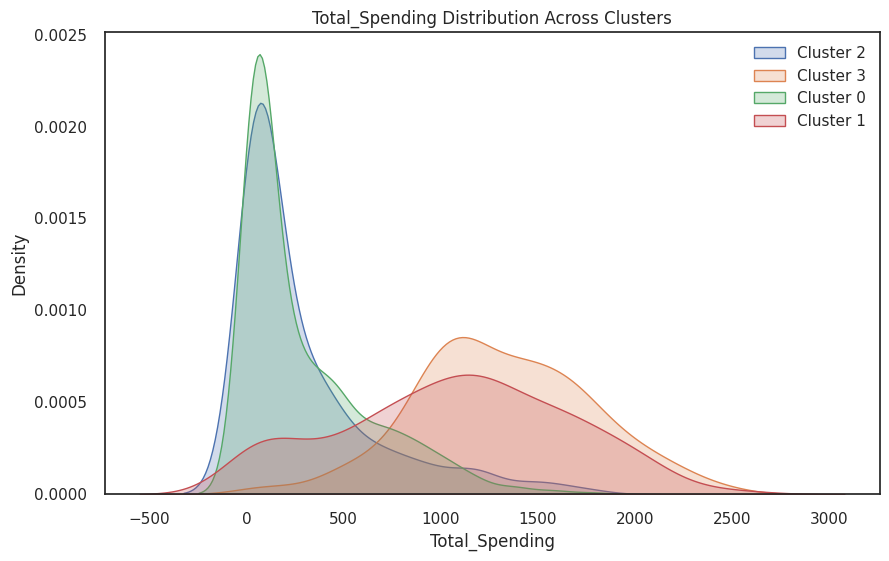

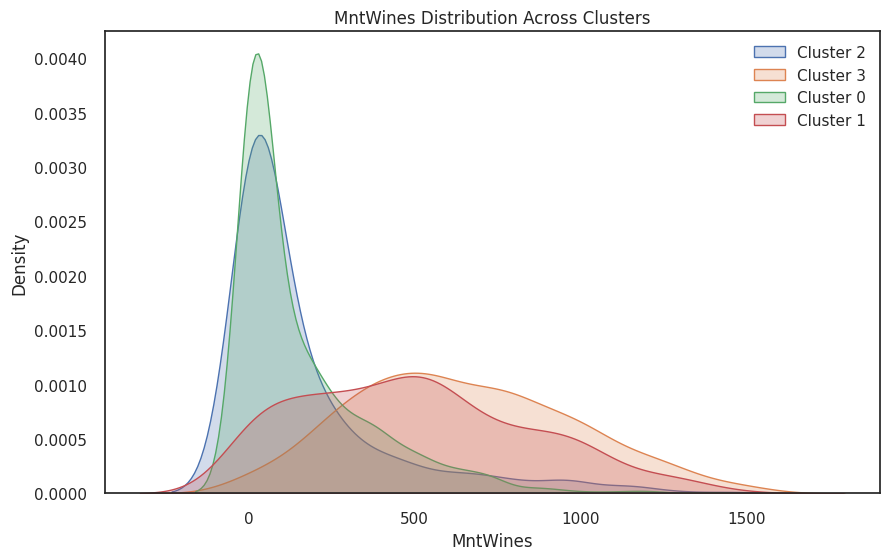

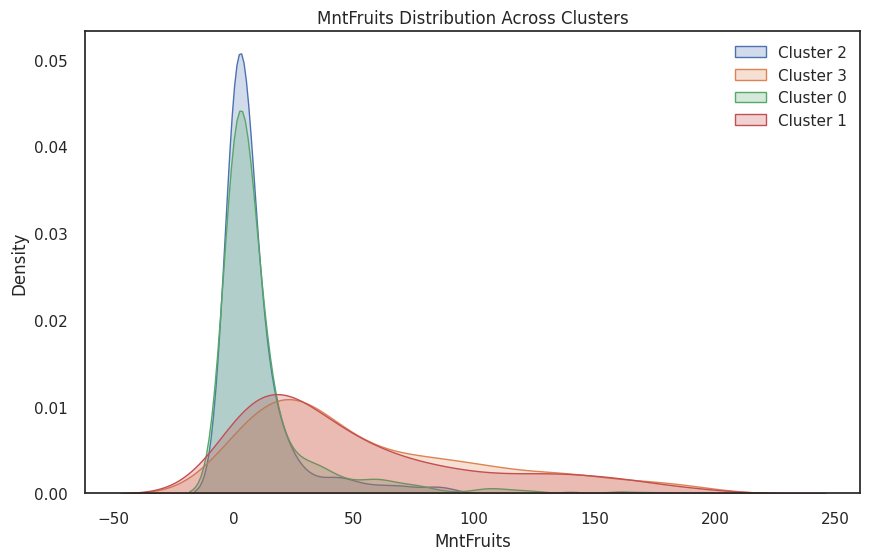

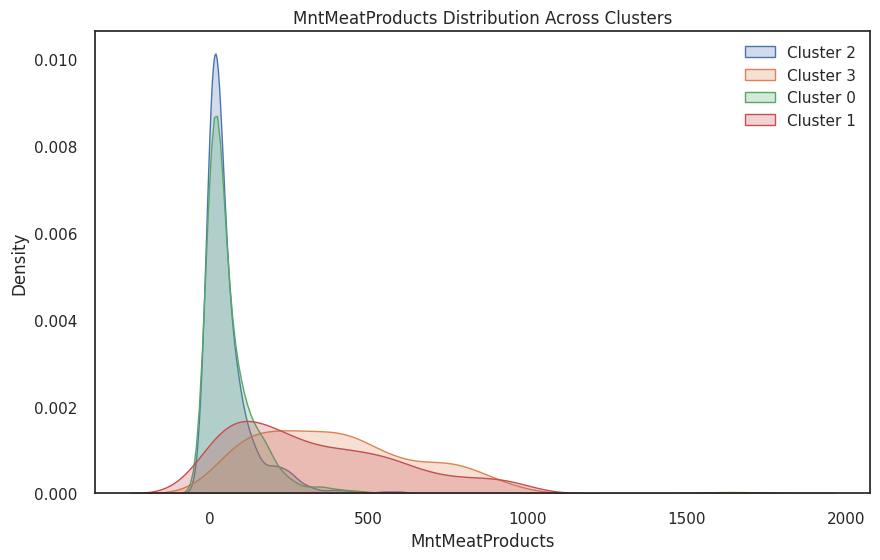

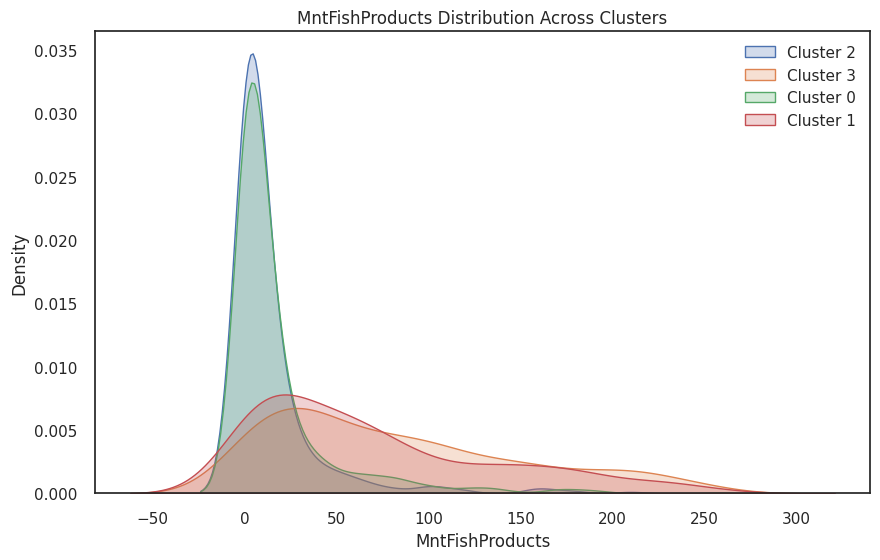

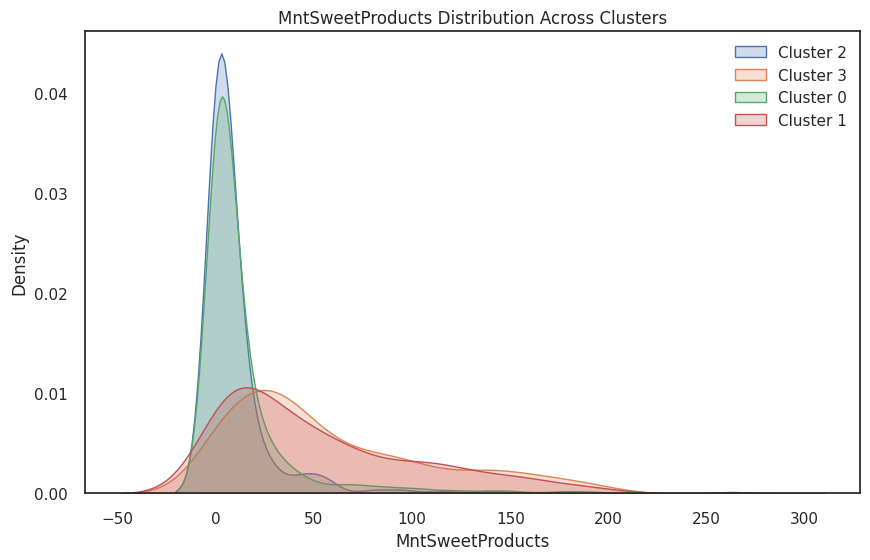

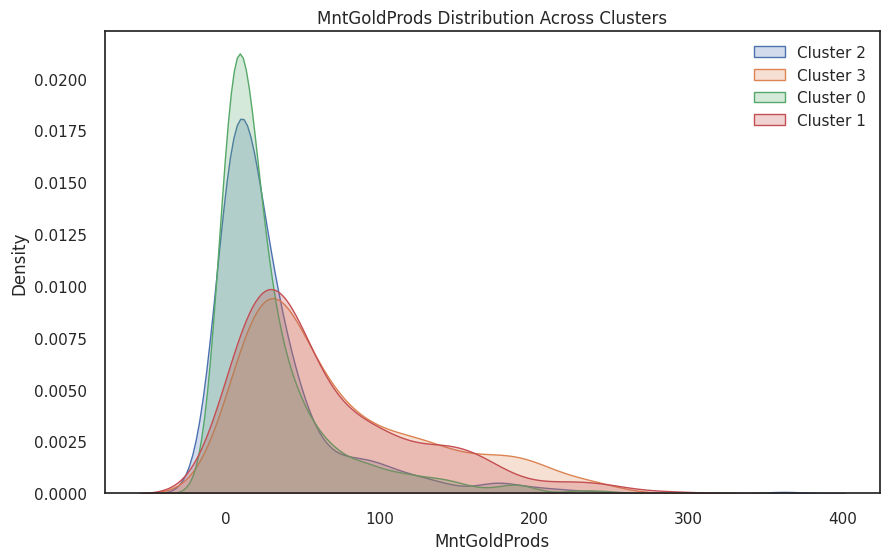

In [37]:
spending_categories = ['Total_Spending', 'MntWines', 'MntFruits', 
                       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for c in spending_categories:
    plot_spending(c)

### Summary Table

| Cluster | Total Accepted Offers | Marital Status | Income Group | Age Group | Customer Tenure | Has Kids | Spending Distribution |
|---------|----------------------|---------------|-------------|----------|----------------|---------|---------------------|
| **0**   | Low (only customers 14% accepted)           | Has Partner | Low (<30k) (24%) to Middle Income (30k-60k) (62%) | Majority 40-60 years (62%) | Evenly distributed | 92% Has Kids (| Low Spending |
| **1**   | Moderate (37% customers accepted)            |  Single   | High Income (60k+) (83%)   | Mixed (41% in 40-60, 43% in 60+) | Low Tenure | 30% Has Kids | High Spending |
| **2**   | Moderate (27% customers accepted)       | Single   | Low (<30k) (23%) to Middle (30k-60k) (71%) | Majority 40-60 (57%) | Loyal Tenure | 96% Has Kids | Low Spending |
| **3**   | High (53% customers accepted)            | Has Partner  | High Income (94%)   | Mixed (47% in 40-60, 43% in 60+) | Loyal Tenure | 30% Has Kids | High Spending |

**Insights:**

**Cluster 0: Low Acceptance, Low Spending**

This group is likely budget-conscious, prioritizing essential spending over discretionary purchases.
Their low acceptance of offers suggests they may not find the offers relevant or valuable.

Recommendations:

Tailor offers to their financial constraints (e.g., discounts, budget-friendly bundles).
Focus on family-oriented products or services.

**Cluster 1: Moderate Acceptance, High Spending**

This group has disposable income and is willing to spend but may not yet be loyal to the brand.
Their moderate acceptance rate suggests they are selective about offers.

Recommendations:

Focus on premium or high-margin products/services.
Offer exclusive or personalized deals to build loyalty.
Target them with lifestyle-oriented marketing.

**Cluster 2: Moderate Acceptance, Low Spending**

This group is loyal but financially constrained, likely prioritizing necessities.
Their moderate acceptance rate indicates they are open to offers but selective.

Recommendations:

Offer value-driven promotions (e.g., buy-one-get-one, loyalty rewards).
Focus on family-friendly products or services.

**Cluster 3: High Acceptance, High Spending**

This group is financially well-off, loyal, and highly responsive to offers.
Their high spending and acceptance rates make them a key target for premium offerings.

Recommendations:

Focus on upselling and cross-selling high-margin products/services.
Offer exclusive or early-access deals to maintain loyalty.
Use personalized marketing to enhance their customer experience.